In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torchvision import transforms
import torch.nn as nn
from PIL import Image

class2num = {'broad leaves': 0, 'coniferous tree': 1, 'grass land': 2, 'hard ground': 3, 'leafless': 4, 'stalk': 5, 'stone': 6, 'trunk': 7, 'water': 8, 'wire': 9}
num2class = {0: 'broad leaves', 1: 'coniferous tree', 2: 'grass land', 3: 'hard ground', 4: 'leafless', 5: 'stalk', 6: 'stone', 7: 'trunk', 8: 'water', 9: 'wire'}
id2num = {
        '0' : class2num['broad leaves'],
        '1' : class2num['coniferous tree'],
        '2' : class2num['hard ground'],
        '3' : class2num['leafless'],
        '4' : class2num['stalk'],
        '5' : class2num['stone'],
        '6' : class2num['trunk'],
        '7' : class2num['grass land'],
        '8' : class2num['water'],
        '9' : class2num['wire'],
        }

In [7]:
imgs_folder = './samples'
imgs = [os.path.join(imgs_folder, fn) for fn in os.listdir(imgs_folder) if os.path.isfile(os.path.join(imgs_folder, fn))]
len(imgs), imgs[0]

(435, './samples\\000002.jpg')

In [11]:
im = imgs[0]
im.split(os.sep)[-1].split('.')[0]

'000002'

In [14]:
df = pd.DataFrame(imgs, columns=['original_fn'])
df['fn_id'] = df['original_fn'].apply(lambda x: x.split(os.sep)[-1].split('.')[0])
df['category'] = df['fn_id'].apply(lambda x: num2class[id2num[x[1]]])
df.sample(10)

,original_fn,fn_id,category
137,./samples\030059.jpg,030059,leafless
422,./samples\090146.jpg,090146,wire
122,./samples\020188.jpg,020188,hard ground
223,./samples\050032.jpg,050032,stone
306,./samples\070012.jpg,070012,grass land
42,./samples\010015.jpg,010015,coniferous tree
82,./samples\010192.jpg,010192,coniferous tree
194,./samples\040103.jpg,040103,stalk
255,./samples\050195.jpg,050195,stone
206,./samples\040184.jpg,040184,stalk


In [15]:
def pred_single_image(modelname, data_transforms, img_path):
    im = Image.open(img_path).convert("RGB")
    tsr = data_transforms(im).unsqueeze(0).to(device)
    outputs = models[modelname](tsr)
    probs = nn.functional.softmax(outputs, dim=1).squeeze()
    probs = probs.detach().numpy()
    pre_label_id = probs.argmax()
    true_label_id = imgName2num(img_path)
    true_label = num2class[true_label_id]
    pred_label = num2class[pre_label_id]
#     print(pre_label_id, true_label_id)
    is_correct = (pre_label_id==true_label_id)
#     print('Is correct:', is_correct, 'True Label:', true_label, 'Predicted Label:',pred_label)
    return is_correct, probs, true_label, pred_label

    
def imgName2num(image_path):
    baseName = os.path.basename(image_path)
    folder_id = baseName[1]
    id2num = {
        '0' : class2num['broad leaves'],
        '1' : class2num['coniferous tree'],
        '2' : class2num['hard ground'],
        '3' : class2num['leafless'],
        '4' : class2num['stalk'],
        '5' : class2num['stone'],
        '6' : class2num['trunk'],
        '7' : class2num['grass land'],
        '8' : class2num['water'],
        '9' : class2num['wire'],
    }
#     print(baseName, folder_id)
    return id2num[str(folder_id)]
    

In [16]:
alexnet = torch.load('alexnet-111_10_5_5.pkl', map_location=torch.device('cpu'))
vgg19 = torch.load('vgg19-111_8_5_5.pkl', map_location=torch.device('cpu'))
res50 = torch.load('resnet50-111_3_5_5.pkl', map_location=torch.device('cpu'))
res152 = torch.load('resnet152-111_5_5_5.pkl', map_location=torch.device('cpu'))

models = {
    'AlexNet'    :alexnet,
    'VGG19'     :vgg19,
    'ResNet50'  :res50,
    'ResNet152' :res152
}
resize = 224
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
device = torch.device('cpu')

data_transforms = transforms.Compose([
    transforms.Resize((resize, resize)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
    ])


model_name = 'ResNet152'

image_path = './samples/000019.jpg'
is_correct, probs, true_label, pred_label = pred_single_image(model_name, data_transforms, image_path)

In [17]:
is_correct, probs, true_label, pred_label

(False, array([2.1285194e-01, 8.1009112e-02, 3.1676289e-04, 8.6702566e-05,
        6.9990057e-01, 8.3827542e-04, 8.0934225e-04, 3.7944631e-03,
        2.0049032e-04, 1.9238006e-04], dtype=float32), 'broad leaves', 'leafless')

In [18]:
columns = ['image', 'Ground Truth', 'AlexNet', 'VGG19', 'ResNet50', 'ResNet152']
pred_results = []
for i,img in enumerate(imgs):
    _,_,gt,pred_label_AlexNet = pred_single_image('AlexNet', data_transforms, img)
    _,_,_,pred_label_VGG19 = pred_single_image('VGG19', data_transforms, img)
    _,_,_,pred_label_ResNet50 = pred_single_image('ResNet50', data_transforms, img)
    _,_,_,pred_label_ResNet152 = pred_single_image('ResNet152', data_transforms, img)
    
    print(i, gt, pred_label_AlexNet, pred_label_VGG19, pred_label_ResNet50, pred_label_ResNet152)
    pred_results.append([img, gt, pred_label_AlexNet, pred_label_VGG19, pred_label_ResNet50, pred_label_ResNet152])

0 broad leaves broad leaves broad leaves broad leaves broad leaves
1 broad leaves broad leaves broad leaves broad leaves broad leaves
2 broad leaves coniferous tree broad leaves broad leaves broad leaves
3 broad leaves broad leaves broad leaves broad leaves broad leaves
4 broad leaves leafless leafless leafless leafless
5 broad leaves broad leaves broad leaves broad leaves broad leaves
6 broad leaves broad leaves stalk broad leaves broad leaves
7 broad leaves broad leaves broad leaves broad leaves broad leaves
8 broad leaves broad leaves broad leaves broad leaves broad leaves
9 broad leaves broad leaves broad leaves broad leaves broad leaves
10 broad leaves broad leaves broad leaves broad leaves broad leaves
11 broad leaves broad leaves broad leaves broad leaves broad leaves
12 broad leaves broad leaves broad leaves broad leaves broad leaves
13 broad leaves broad leaves broad leaves broad leaves broad leaves
14 broad leaves broad leaves broad leaves broad leaves broad leaves
15 broad l

In [19]:
df = pd.DataFrame(pred_results, columns=columns)
df.head()

,image,Ground Truth,AlexNet,VGG19,ResNet50,ResNet152
0,./samples\000002.jpg,broad leaves,broad leaves,broad leaves,broad leaves,broad leaves
1,./samples\000003.jpg,broad leaves,broad leaves,broad leaves,broad leaves,broad leaves
2,./samples\000009.jpg,broad leaves,coniferous tree,broad leaves,broad leaves,broad leaves
3,./samples\000010.jpg,broad leaves,broad leaves,broad leaves,broad leaves,broad leaves
4,./samples\000019.jpg,broad leaves,leafless,leafless,leafless,leafless


# Precision, Recall, F1-score

In [23]:
class_names = list(class2num.keys())

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
from scikitplot.metrics import plot_roc, plot_precision_recall

print(classification_report(y_true=df['Ground Truth'], y_pred=df['AlexNet'], target_names=class_names))

                 precision    recall  f1-score   support

   broad leaves       0.85      0.95      0.90        41
coniferous tree       0.92      0.81      0.86        42
     grass land       0.95      0.95      0.95        41
    hard ground       1.00      0.88      0.94        41
       leafless       0.84      0.81      0.83        47
          stalk       0.89      0.89      0.89        47
          stone       0.93      0.88      0.90        42
          trunk       0.98      0.93      0.95        44
          water       0.92      1.00      0.96        46
           wire       0.84      0.98      0.91        44

       accuracy                           0.91       435
      macro avg       0.91      0.91      0.91       435
   weighted avg       0.91      0.91      0.91       435



In [32]:
print(classification_report(y_true=df['Ground Truth'], y_pred=df['VGG19'], target_names=class_names))

                 precision    recall  f1-score   support

   broad leaves       0.95      0.93      0.94        41
coniferous tree       0.97      0.90      0.94        42
     grass land       0.95      1.00      0.98        41
    hard ground       1.00      0.98      0.99        41
       leafless       0.95      0.83      0.89        47
          stalk       0.85      0.94      0.89        47
          stone       0.93      0.93      0.93        42
          trunk       0.98      0.95      0.97        44
          water       0.98      1.00      0.99        46
           wire       0.92      1.00      0.96        44

       accuracy                           0.94       435
      macro avg       0.95      0.95      0.95       435
   weighted avg       0.95      0.94      0.94       435



In [33]:
print(classification_report(y_true=df['Ground Truth'], y_pred=df['ResNet50'], target_names=class_names))

                 precision    recall  f1-score   support

   broad leaves       0.98      0.98      0.98        41
coniferous tree       0.98      0.95      0.96        42
     grass land       0.95      0.98      0.96        41
    hard ground       1.00      0.95      0.97        41
       leafless       0.89      0.87      0.88        47
          stalk       0.86      0.91      0.89        47
          stone       0.95      0.95      0.95        42
          trunk       0.98      0.98      0.98        44
          water       0.98      1.00      0.99        46
           wire       0.98      0.95      0.97        44

       accuracy                           0.95       435
      macro avg       0.95      0.95      0.95       435
   weighted avg       0.95      0.95      0.95       435



In [34]:
print(classification_report(y_true=df['Ground Truth'], y_pred=df['ResNet152'], target_names=class_names))

                 precision    recall  f1-score   support

   broad leaves       0.95      0.98      0.96        41
coniferous tree       1.00      0.95      0.98        42
     grass land       0.95      0.98      0.96        41
    hard ground       1.00      0.98      0.99        41
       leafless       0.91      0.89      0.90        47
          stalk       0.88      0.89      0.88        47
          stone       0.95      0.93      0.94        42
          trunk       0.96      0.98      0.97        44
          water       0.98      1.00      0.99        46
           wire       0.98      0.98      0.98        44

       accuracy                           0.95       435
      macro avg       0.96      0.95      0.96       435
   weighted avg       0.95      0.95      0.95       435



# Confuse Matrix Show

In [37]:
confusion_matrix_AlexNet = pd.DataFrame(confusion_matrix(y_true=df['Ground Truth'], y_pred=df['AlexNet']), index=class_names, columns=class_names)
confusion_matrix_VGG19 = pd.DataFrame(confusion_matrix(y_true=df['Ground Truth'], y_pred=df['VGG19']), index=class_names, columns=class_names)
confusion_matrix_ResNet50 = pd.DataFrame(confusion_matrix(y_true=df['Ground Truth'], y_pred=df['ResNet50']), index=class_names, columns=class_names)
confusion_matrix_ResNet152 = pd.DataFrame(confusion_matrix(y_true=df['Ground Truth'], y_pred=df['ResNet152']), index=class_names, columns=class_names)

## AlexNet

In [37]:
confusion_matrix_AlexNet

,broad leaves,coniferous tree,grass land,hard ground,leafless,stalk,stone,trunk,water,wire
broad leaves,39,1,0,0,1,0,0,0,0,0
coniferous tree,3,34,1,0,1,1,1,0,0,1
grass land,1,1,39,0,0,0,0,0,0,0
hard ground,0,0,0,36,0,1,1,0,3,0
leafless,0,0,0,0,38,2,1,0,0,6
stalk,3,0,0,0,1,42,0,0,0,1
stone,0,1,1,0,1,0,37,1,1,0
trunk,0,0,0,0,3,0,0,41,0,0
water,0,0,0,0,0,0,0,0,46,0
wire,0,0,0,0,0,1,0,0,0,43


## VGG19

In [38]:
confusion_matrix_VGG19

,broad leaves,coniferous tree,grass land,hard ground,leafless,stalk,stone,trunk,water,wire
broad leaves,38,0,0,0,1,2,0,0,0,0
coniferous tree,0,38,1,0,0,0,1,1,0,1
grass land,0,0,41,0,0,0,0,0,0,0
hard ground,0,0,0,40,0,0,1,0,0,0
leafless,0,0,0,0,39,5,1,0,0,2
stalk,1,1,0,0,0,44,0,0,0,1
stone,1,0,1,0,0,0,39,0,1,0
trunk,0,0,0,0,1,1,0,42,0,0
water,0,0,0,0,0,0,0,0,46,0
wire,0,0,0,0,0,0,0,0,0,44


## ResNet50

In [39]:
confusion_matrix_ResNet50

,broad leaves,coniferous tree,grass land,hard ground,leafless,stalk,stone,trunk,water,wire
broad leaves,40,0,0,0,1,0,0,0,0,0
coniferous tree,0,40,0,0,0,0,0,1,0,1
grass land,0,0,40,0,0,0,1,0,0,0
hard ground,0,0,0,39,0,0,1,0,1,0
leafless,0,0,0,0,41,6,0,0,0,0
stalk,1,0,1,0,2,43,0,0,0,0
stone,0,1,1,0,0,0,40,0,0,0
trunk,0,0,0,0,1,0,0,43,0,0
water,0,0,0,0,0,0,0,0,46,0
wire,0,0,0,0,1,1,0,0,0,42


## ResNet152

In [40]:
confusion_matrix_ResNet152

,broad leaves,coniferous tree,grass land,hard ground,leafless,stalk,stone,trunk,water,wire
broad leaves,40,0,0,0,1,0,0,0,0,0
coniferous tree,0,40,0,0,0,0,0,1,0,1
grass land,0,0,40,0,0,0,1,0,0,0
hard ground,0,0,0,40,0,0,1,0,0,0
leafless,0,0,0,0,42,5,0,0,0,0
stalk,2,0,1,0,2,42,0,0,0,0
stone,0,0,1,0,0,0,39,1,1,0
trunk,0,0,0,0,1,0,0,43,0,0
water,0,0,0,0,0,0,0,0,46,0
wire,0,0,0,0,0,1,0,0,0,43


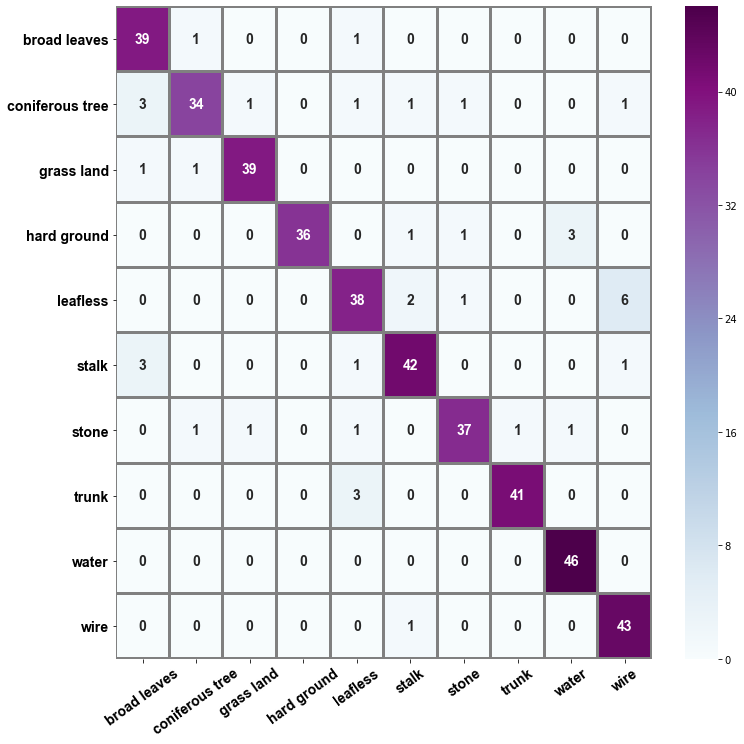

In [100]:
import seaborn as sns

ticks_size = 14
values_size = 14
ft = {
#     'family':'Times New Roman',
    'family':'Arial',
    'weight':'bold',
    'size'  : values_size
}
plt.figure(figsize=(12,12))

# cmap = sns.cubehelix_palette(light=1, as_cmap=True)
# cmap = sns.cubehelix_palette(light=1, as_cmap=True)
cmap="BuPu"
sns.heatmap(
    confusion_matrix_AlexNet,
    annot=True,
    annot_kws=ft,
    fmt='d',
    cmap=cmap,
    linewidths=2,
#     linecolor='ivory',
    linecolor='gray',

    )

plt.xticks(
    rotation=36, 
    family='Arial',
    size=ticks_size,
    weight='bold',
#     style='oblique'  # 'normal', 'italic', 'oblique'
    ) 
plt.yticks(
    family='Arial',
    size=ticks_size,
        weight='bold',
    ) 
ax = plt.gca()
for tick in ax.xaxis.get_minor_ticks():
    tick.tick1line.set_markersize(0)
    tick.tick2line.set_markersize(0)
    tick.label1.set_horizontalalignment('center')
for tick in ax.yaxis.get_minor_ticks():
    tick.tick1line.set_markersize(0)
    tick.tick2line.set_markersize(0)
    tick.label1.set_horizontalalignment('center')
plt.savefig('ctf_AlexNet.png', dpi=500)

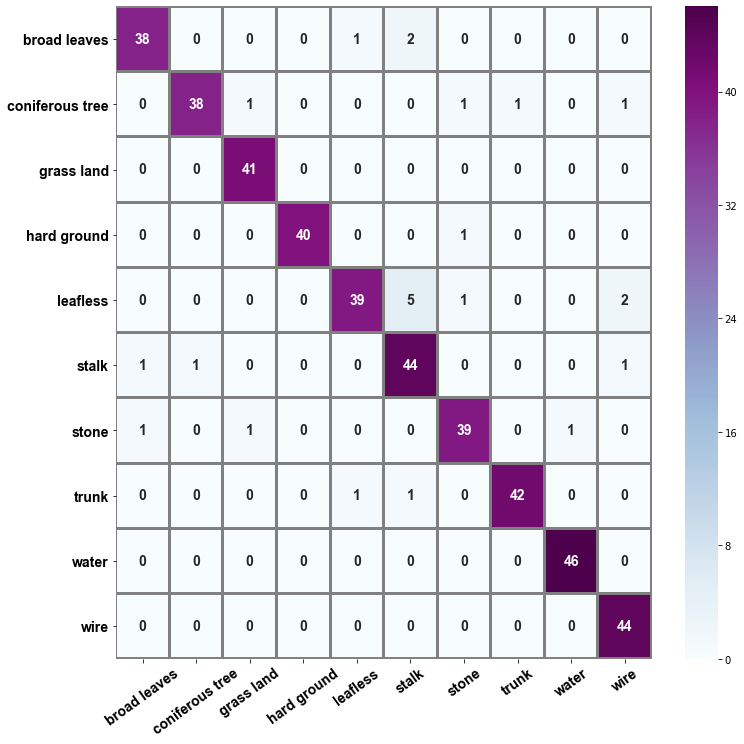

In [101]:
import seaborn as sns

ticks_size = 14
values_size = 14
ft = {
#     'family':'Times New Roman',
    'family':'Arial',
    'weight':'bold',
    'size'  : values_size
}
plt.figure(figsize=(12,12))

# cmap = sns.cubehelix_palette(light=1, as_cmap=True)
# cmap = sns.cubehelix_palette(light=1, as_cmap=True)
cmap="BuPu"
sns.heatmap(
    confusion_matrix_VGG19,
    annot=True,
    annot_kws=ft,
    fmt='d',
    cmap=cmap,
    linewidths=2,
#     linecolor='ivory',
    linecolor='gray',

    )

plt.xticks(
    rotation=36, 
    family='Arial',
    size=ticks_size,
    weight='bold',
#     style='oblique'  # 'normal', 'italic', 'oblique'
    ) 
plt.yticks(
    family='Arial',
    size=ticks_size,
        weight='bold',
    ) 
ax = plt.gca()
for tick in ax.xaxis.get_minor_ticks():
    tick.tick1line.set_markersize(0)
    tick.tick2line.set_markersize(0)
    tick.label1.set_horizontalalignment('center')
for tick in ax.yaxis.get_minor_ticks():
    tick.tick1line.set_markersize(0)
    tick.tick2line.set_markersize(0)
    tick.label1.set_horizontalalignment('center')
plt.savefig('ctf_VGG19.png', dpi=500)

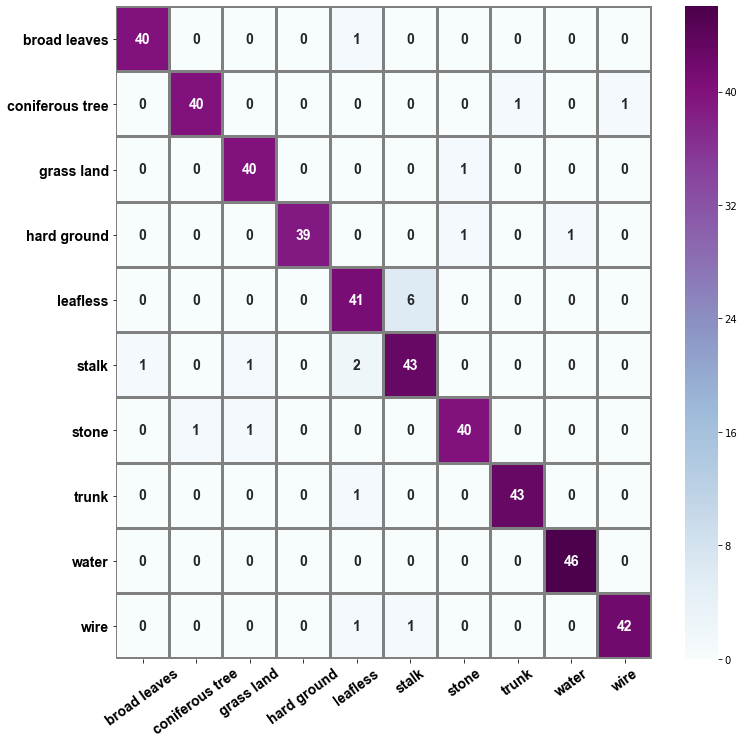

In [102]:
import seaborn as sns

ticks_size = 14
values_size = 14
ft = {
#     'family':'Times New Roman',
    'family':'Arial',
    'weight':'bold',
    'size'  : values_size
}
plt.figure(figsize=(12,12))

# cmap = sns.cubehelix_palette(light=1, as_cmap=True)
# cmap = sns.cubehelix_palette(light=1, as_cmap=True)
cmap="BuPu"
sns.heatmap(
    confusion_matrix_ResNet50,
    annot=True,
    annot_kws=ft,
    fmt='d',
    cmap=cmap,
    linewidths=2,
#     linecolor='ivory',
    linecolor='gray',

    )

plt.xticks(
    rotation=36, 
    family='Arial',
    size=ticks_size,
    weight='bold',
#     style='oblique'  # 'normal', 'italic', 'oblique'
    ) 
plt.yticks(
    family='Arial',
    size=ticks_size,
        weight='bold',
    ) 
ax = plt.gca()
for tick in ax.xaxis.get_minor_ticks():
    tick.tick1line.set_markersize(0)
    tick.tick2line.set_markersize(0)
    tick.label1.set_horizontalalignment('center')
for tick in ax.yaxis.get_minor_ticks():
    tick.tick1line.set_markersize(0)
    tick.tick2line.set_markersize(0)
    tick.label1.set_horizontalalignment('center')
plt.savefig('ctf_ResNet50.png', dpi=500)

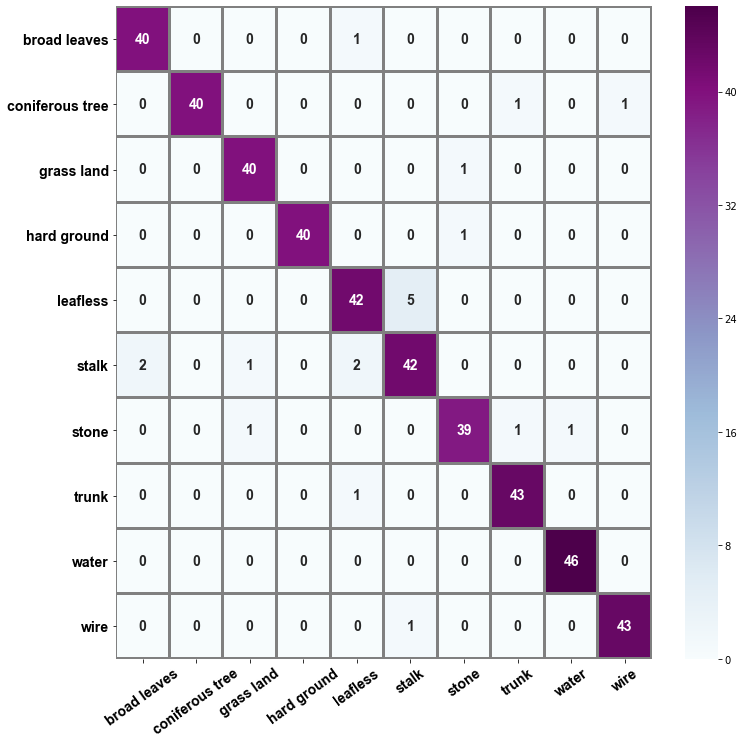

In [103]:
import seaborn as sns

ticks_size = 14
values_size = 14
ft = {
#     'family':'Times New Roman',
    'family':'Arial',
    'weight':'bold',
    'size'  : values_size
}
plt.figure(figsize=(12,12))

# cmap = sns.cubehelix_palette(light=1, as_cmap=True)
# cmap = sns.cubehelix_palette(light=1, as_cmap=True)
cmap="BuPu"
sns.heatmap(
    confusion_matrix_ResNet152,
    annot=True,
    annot_kws=ft,
    fmt='d',
    cmap=cmap,
    linewidths=2,
#     linecolor='ivory',
    linecolor='gray',

    )

plt.xticks(
    rotation=36, 
    family='Arial',
    size=ticks_size,
    weight='bold',
#     style='oblique'  # 'normal', 'italic', 'oblique'
    ) 
plt.yticks(
    family='Arial',
    size=ticks_size,
        weight='bold',
    ) 
ax = plt.gca()
for tick in ax.xaxis.get_minor_ticks():
    tick.tick1line.set_markersize(0)
    tick.tick2line.set_markersize(0)
    tick.label1.set_horizontalalignment('center')
for tick in ax.yaxis.get_minor_ticks():
    tick.tick1line.set_markersize(0)
    tick.tick2line.set_markersize(0)
    tick.label1.set_horizontalalignment('center')
plt.savefig('ctf_ResNet152.png', dpi=500)